# EDA

In [9]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.regularizers import l2
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import classification_report

## Male Neutral

In [2]:
# LOAD IN FILE
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

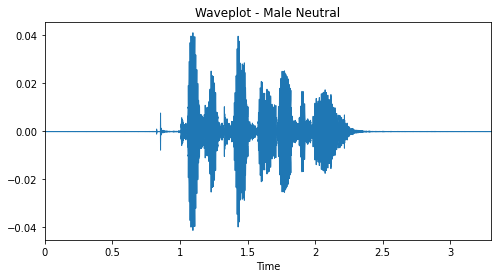

In [57]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')

In [239]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleNeutral.wav', x, sr)
Audio(data=x, rate=sr)

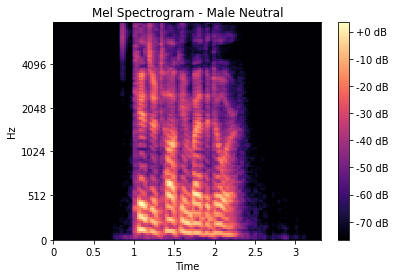

In [240]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

## Female Calm

In [241]:
# LOAD IN FILE
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_02/03-01-02-01-01-01-02.wav')

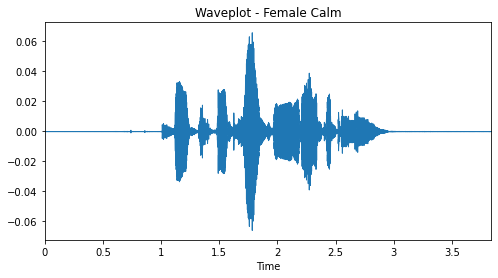

In [242]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')


In [243]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/FemaleCalm.wav', x, sr)
Audio(data=x, rate=sr)

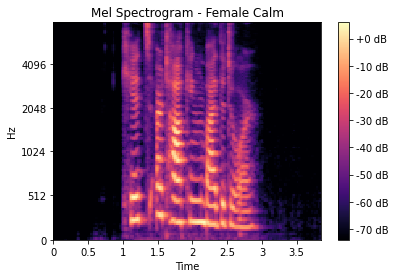

In [244]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

## Male Happy

In [245]:
# LOAD FILE
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_03/03-01-03-01-01-01-03.wav')

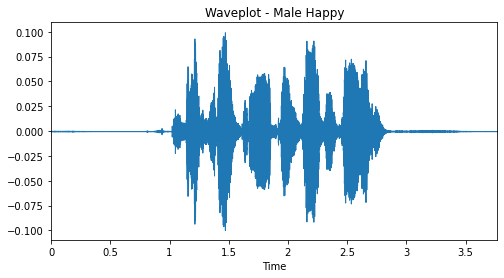

In [246]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

In [247]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleHappy.wav', x, sr)
Audio(data=x, rate=sr)

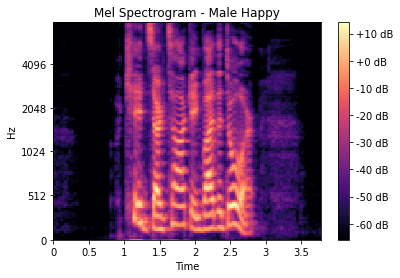

In [248]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');

## Female Sad

In [249]:
# LOAD FILE
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_04/03-01-04-01-01-01-04.wav')


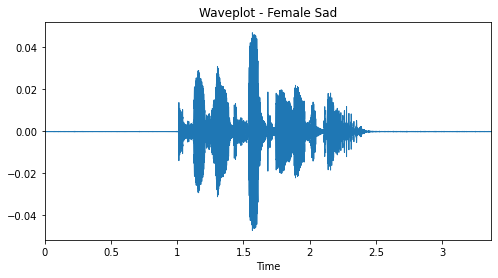

In [250]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

In [251]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/FemaleSad.wav', x, sr)
Audio(data=x, rate=sr)

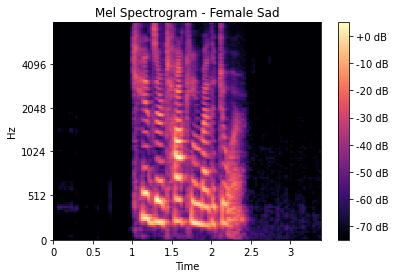

In [252]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');

## Male Angry

In [253]:
# LOAD FILE
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-01-05.wav')


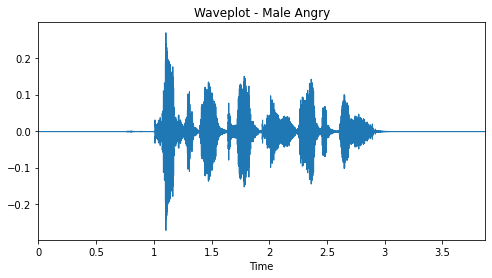

In [254]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

In [255]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleAngry.wav', x, sr)
Audio(data=x, rate=sr)

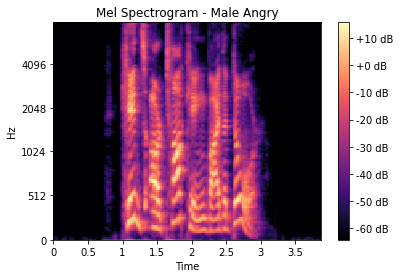

In [256]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');

## Female Fearful

In [257]:
# LOAD FILE
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_06/03-01-06-01-01-01-06.wav')

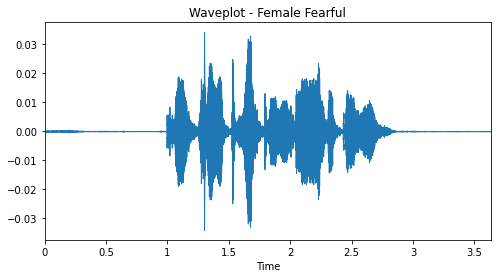

In [258]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')


In [259]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/FemaleFearful.wav', x, sr)
Audio(data=x, rate=sr)

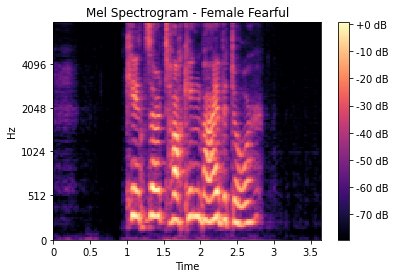

In [260]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');

## Male Disgust

In [261]:
# LOAD FILE
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_07/03-01-07-01-01-01-07.wav')



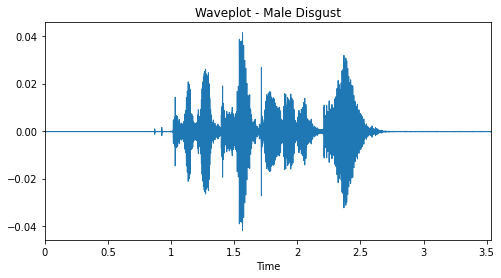

In [262]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')


In [263]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/MaleDisgust.wav', x, sr)
Audio(data=x, rate=sr)

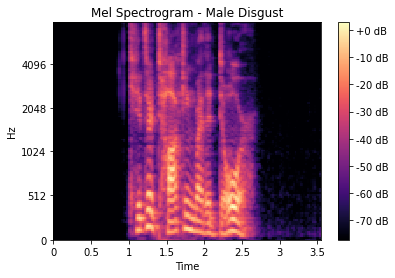

In [264]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB');

## Female Surprised

In [265]:
# LOAD FILE
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_08/03-01-08-01-01-01-08.wav')

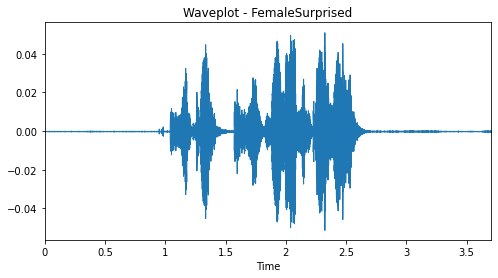

In [266]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')


In [267]:
# PLAY AUDIO FILE
librosa.output.write_wav('ipd.Audio Files/FemaleSurprised.wav', x, sr)
Audio(data=x, rate=sr)

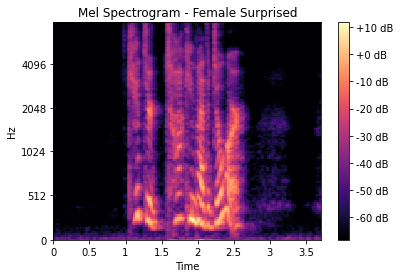

In [268]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB');

# Data Preprocessing

## Labeling Audio Files

In [10]:
# CREATE DIRECTORY OF AUDIO FILES 
audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [11]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER AND GENDER LABEL
emotion = []
gender = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [12]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df],axis=1)
audio_df.columns = ['gender','emotion']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,path
0,male,surprise,/Users/murielkosaka/Desktop/capstone_project/a...
1,male,surprise,/Users/murielkosaka/Desktop/capstone_project/a...
2,male,angry,/Users/murielkosaka/Desktop/capstone_project/a...
3,male,fear,/Users/murielkosaka/Desktop/capstone_project/a...
4,male,fear,/Users/murielkosaka/Desktop/capstone_project/a...
...,...,...,...
1435,female,fear,/Users/murielkosaka/Desktop/capstone_project/a...
1436,female,fear,/Users/murielkosaka/Desktop/capstone_project/a...
1437,female,angry,/Users/murielkosaka/Desktop/capstone_project/a...
1438,female,surprise,/Users/murielkosaka/Desktop/capstone_project/a...


<AxesSubplot:>

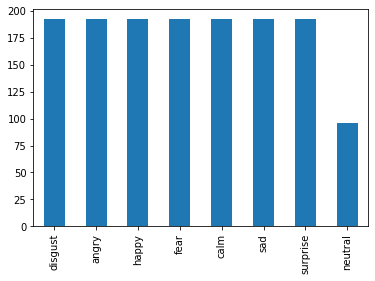

In [13]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

In [14]:
# DROP GENDER COLUMN FOR CNN MODEL
audio_df.drop(columns='gender',inplace=True)

In [15]:
# EXPORT TO CSV
audio_df.to_csv('audio.csv')

## Feature Extraction

In [16]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
df = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    
    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
        
    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    df.loc[counter] = [log_spectrogram]
    counter=counter+1   

print(len(df))
df.head()

1440


,mel_spectrogram
0,"[-71.20022, -71.20022, -71.20022, -71.20022, -..."
1,"[-70.46105, -70.46105, -70.46105, -70.46105, -..."
2,"[-64.17679, -64.39374, -64.444954, -64.26804, ..."
3,"[-73.2803, -73.2803, -73.2803, -73.2803, -73.2..."
4,"[-44.965843, -44.467876, -44.512608, -44.93480..."


In [17]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

In [18]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [19]:
# CHECK TOP 5 ROWS
df_combined.head()

,emotion,0,1,2,3,4,5,6,7,8,...,249,250,251,252,253,254,255,256,257,258
0,surprise,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,...,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218
1,surprise,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,...,-70.461052,-70.461052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,angry,-64.176788,-64.393738,-64.444954,-64.268044,-64.303825,-64.468147,-64.468147,-64.468147,-64.468147,...,-64.468147,-64.468147,-64.468147,-64.468147,-64.422607,-64.364937,-64.468147,-64.465858,-64.354759,-64.385941
3,fear,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.255249,-73.086319,-73.234695,-73.280296,...,-72.866135,-73.029083,-73.021973,-73.157417,-73.278503,-73.280296,-73.272202,-73.042091,-72.969475,-73.264915
4,fear,-44.965843,-44.467876,-44.512608,-44.934807,-44.679760,-44.350895,-45.161110,-46.124241,-45.938686,...,-42.328346,-42.546494,-43.290047,-42.981064,-43.380680,-44.499775,-44.815922,-45.377876,-45.876091,-46.404274


# Prepping Data for Modeling

In [37]:
# STRATIFIED SHUFFLE SPLIT TO COMBAT CLASS IMBALANCE
X = df_combined.drop(['emotion'], axis=1)
y = df_combined.emotion
SSS = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in SSS.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

<AxesSubplot:>

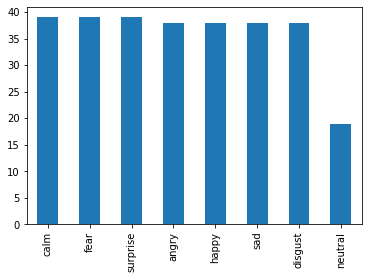

In [38]:
# CHECK CLASS DISTRIBUTION 
y_test.value_counts().plot(kind='bar')

In [39]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [40]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [41]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]


In [42]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [43]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_test.shape

(288, 259, 1)

## Base Model

In [33]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)


0.09722222222222222

In [34]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.3472222222222222

## Initial Model

In [44]:
# BUILD 1D CNN LAYERS
model = Sequential()
model.add(Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.4))
model.add(Conv1D(128, kernel_size=(10),activation='relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 250, 64)           704       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 30, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 128)            0         
__________

In [37]:
# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])



Train on 1152 samples, validate on 288 samples
Epoch 1/40
1152/1152 [==============================] - 6s 5ms/step - loss: 2.8602 - acc: 0.1467 - val_loss: 2.7806 - val_acc: 0.2639
Epoch 2/40
1152/1152 [==============================] - 5s 4ms/step - loss: 2.6956 - acc: 0.1823 - val_loss: 2.6148 - val_acc: 0.2569
Epoch 3/40
1152/1152 [==============================] - 4s 4ms/step - loss: 2.5284 - acc: 0.2587 - val_loss: 2.4771 - val_acc: 0.2708
Epoch 4/40
1152/1152 [==============================] - 4s 4ms/step - loss: 2.4104 - acc: 0.2491 - val_loss: 2.3816 - val_acc: 0.2743
Epoch 5/40
1152/1152 [==============================] - 4s 4ms/step - loss: 2.3362 - acc: 0.2543 - val_loss: 2.3189 - val_acc: 0.2847
Epoch 6/40
1152/1152 [==============================] - 4s 4ms/step - loss: 2.2712 - acc: 0.2535 - val_loss: 2.2591 - val_acc: 0.2917
Epoch 7/40
1152/1152 [==============================] - 5s 4ms/step - loss: 2.1980 - acc: 0.2760 - val_loss: 2.2082 - val_acc: 0.3194
Epoch 8/40
1152

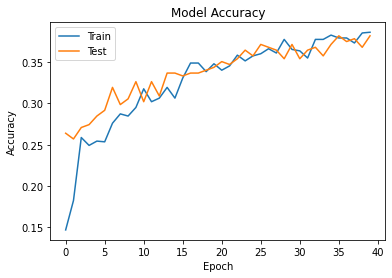

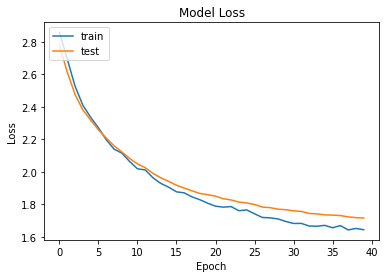

In [49]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

## Post-Model Analysis

In [47]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

288/288 [==============================] - 0s 1ms/step
Loss of the model is -  1.7150656912061903
288/288 [==============================] - 0s 1ms/step
Accuracy of the model is -  38.19444444444444 %


In [48]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,calm
141,disgust,disgust
142,fear,angry
143,happy,calm
144,disgust,sad
145,calm,disgust
146,happy,disgust
147,fear,surprise
148,fear,angry
149,fear,angry


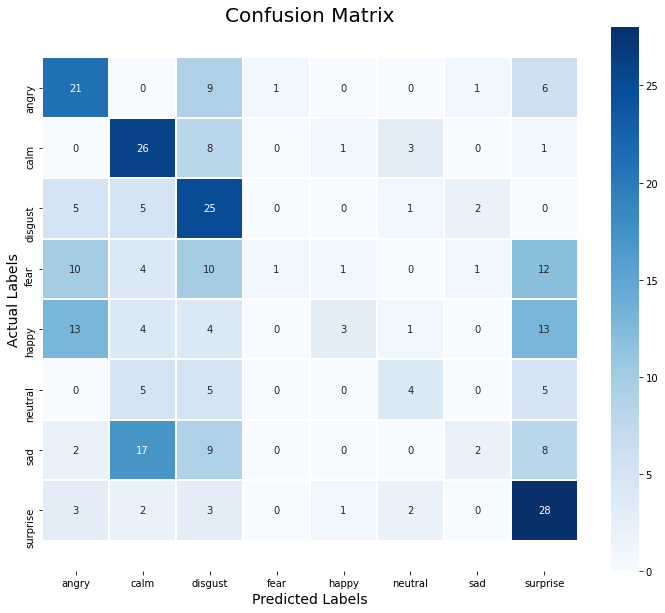

In [45]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [46]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.39      0.55      0.46        38
        calm       0.41      0.67      0.51        39
     disgust       0.34      0.66      0.45        38
        fear       0.50      0.03      0.05        39
       happy       0.50      0.08      0.14        38
     neutral       0.36      0.21      0.27        19
         sad       0.33      0.05      0.09        38
    surprise       0.38      0.72      0.50        39

    accuracy                           0.38       288
   macro avg       0.40      0.37      0.31       288
weighted avg       0.41      0.38      0.31       288



## Hyperparameter Tuning

In [112]:
# STRATIFIED SHUFFLE SPLIT
X = df_combined.drop(['emotion'], axis=1)
y = df_combined.emotion
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [113]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [114]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [115]:
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [116]:
# CREATE FUNCTION FOR KERAS CLASSIFIER
def make_classifier(optimizer='adam'):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(Conv1D(32, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Dropout(0.25))
    model.add(Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model


In [117]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_train)

Epoch 1/1
921/921 [==============================] - 3s 3ms/step - loss: 2.2374 - acc: 0.2486
Epoch 1/1
921/921 [==============================] - 4s 4ms/step - loss: 2.2414 - acc: 0.2226
Epoch 1/1
922/922 [==============================] - 3s 4ms/step - loss: 2.2378 - acc: 0.2321
Epoch 1/1
922/922 [==============================] - 3s 3ms/step - loss: 2.2274 - acc: 0.2354
Epoch 1/1
922/922 [==============================] - 4s 4ms/step - loss: 2.2238 - acc: 0.2332
Epoch 1/1
921/921 [==============================] - 3s 4ms/step - loss: 2.2400 - acc: 0.2182
Epoch 1/1
921/921 [==============================] - 3s 4ms/step - loss: 2.2612 - acc: 0.2248
Epoch 1/1
922/922 [==============================] - 3s 4ms/step - loss: 2.2262 - acc: 0.2093
Epoch 1/1
922/922 [==============================] - 4s 4ms/step - loss: 2.1923 - acc: 0.2484
Epoch 1/1
922/922 [==============================] - 4s 5ms/step - loss: 2.2620 - acc: 0.2050
Epoch 1/1
921/921 [==============================] - 4s 5ms/

In [35]:
grid_search.best_params_

{'batch_size': 30, 'nb_epoch': 150, 'optimizer': 'adam'}

In [36]:
grid_search.best_score_

0.23436100131752308